In [1]:
!pip install basemap basemap-data

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 12.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 43.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 71.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.0
    Uninstalling pyproj-3.7.0:
      Successfully uninstalled pyproj-3.7.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.12.0 requires pyarrow<19.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 19.0.0 which is incompatible.
mlxtend 0.23.3 requires scikit

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import chardet
import textwrap
import seaborn as sns
import warnings
from IPython.display import HTML, display

import plotly.offline as py
import plotly.graph_objs as go

import folium
import folium.plugins

from mpl_toolkits.basemap import Basemap



In [3]:
plt.style.use('fivethirtyeight')
warnings.simplefilter(action = 'ignore')

### 전세계에서 일어난 테러데이터를 Visualization & EDA 하는 데이터 분석

In [4]:
with open("/kaggle/input/gtd/globalterrorismdb_0718dist.csv", "rb") as f:
    raw_data = f.read(50000)

result = chardet.detect(raw_data)
encoding = result['encoding']
print(f"Encoding: {encoding}, Confidence: {result['confidence']:.2f}")

Encoding: ISO-8859-1, Confidence: 0.73


In [5]:
terror_df = pd.read_csv('/kaggle/input/gtd/globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')
terror_df.rename(
    columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
             'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
             'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
             'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'}
    ,inplace=True)

terror_df=terror_df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror_df['casualities']=terror_df['Killed']+terror_df['Wounded']

In [6]:
terror_df.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


#### Baisc EDA

In [7]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181256 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181053 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  casualities  164817 non-null  float64
dtypes: float64(5), int64(3),

In [8]:
print(f"Country with the most Frequent Terror: \
{terror_df['Country'].value_counts().index[0]}")
print(f"Region with the most Frequent Terror: \
{terror_df['Region'].value_counts().index[0]}")
print(textwrap.dedent
      (f"""Max Casualty in a Single Attack: {int(terror_df['Killed'].max())}
Took Place in: {terror_df.loc[terror_df['Killed'].idxmax() ].Country}"""))



Country with the most Frequent Terror: Iraq
Region with the most Frequent Terror: Middle East & North Africa
Max Casualty in a Single Attack: 1570
Took Place in: Iraq


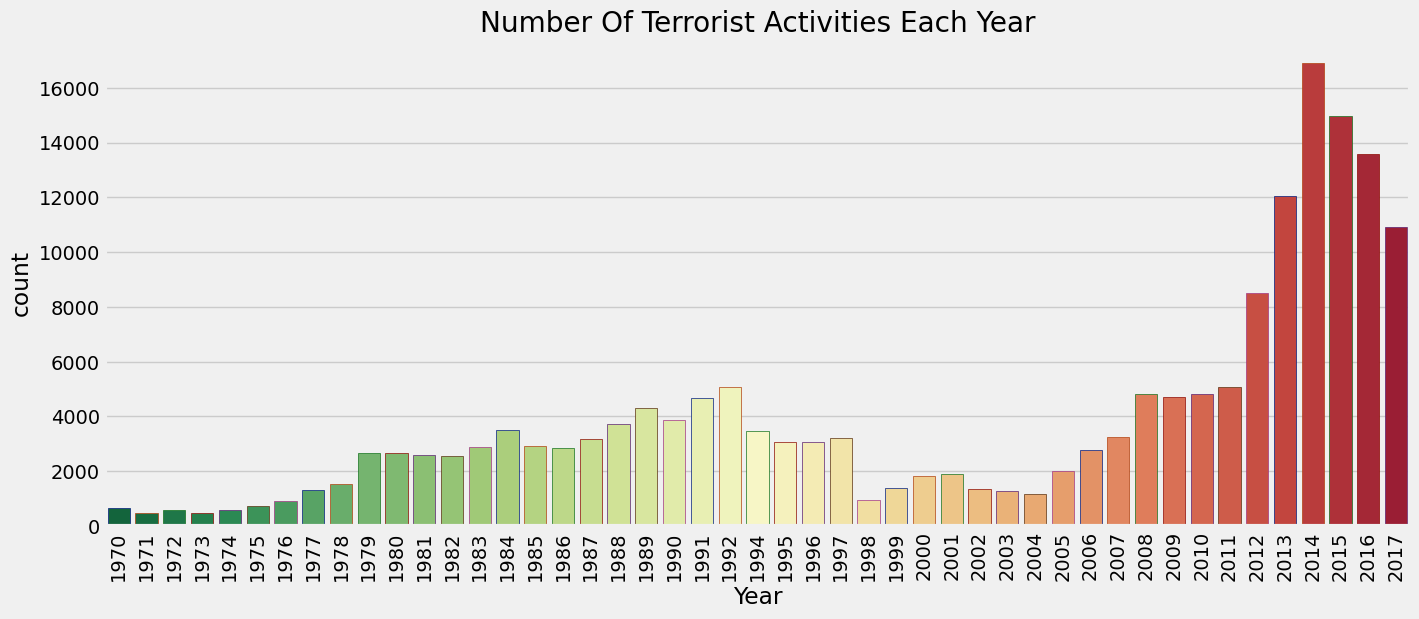

In [9]:

plt.subplots(figsize = (15, 6))
sns.countplot(x = 'Year', data =terror_df, palette = 'RdYlGn_r', 
              edgecolor = sns.color_palette('dark', 7) )
plt.xticks(rotation = 90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

2000년대 초반 잠시 줄어들었다 다시 가파른 상승세를 보인다. 중동에서의 IS 활동과 관계가 있을 가능성이 존재한다. 

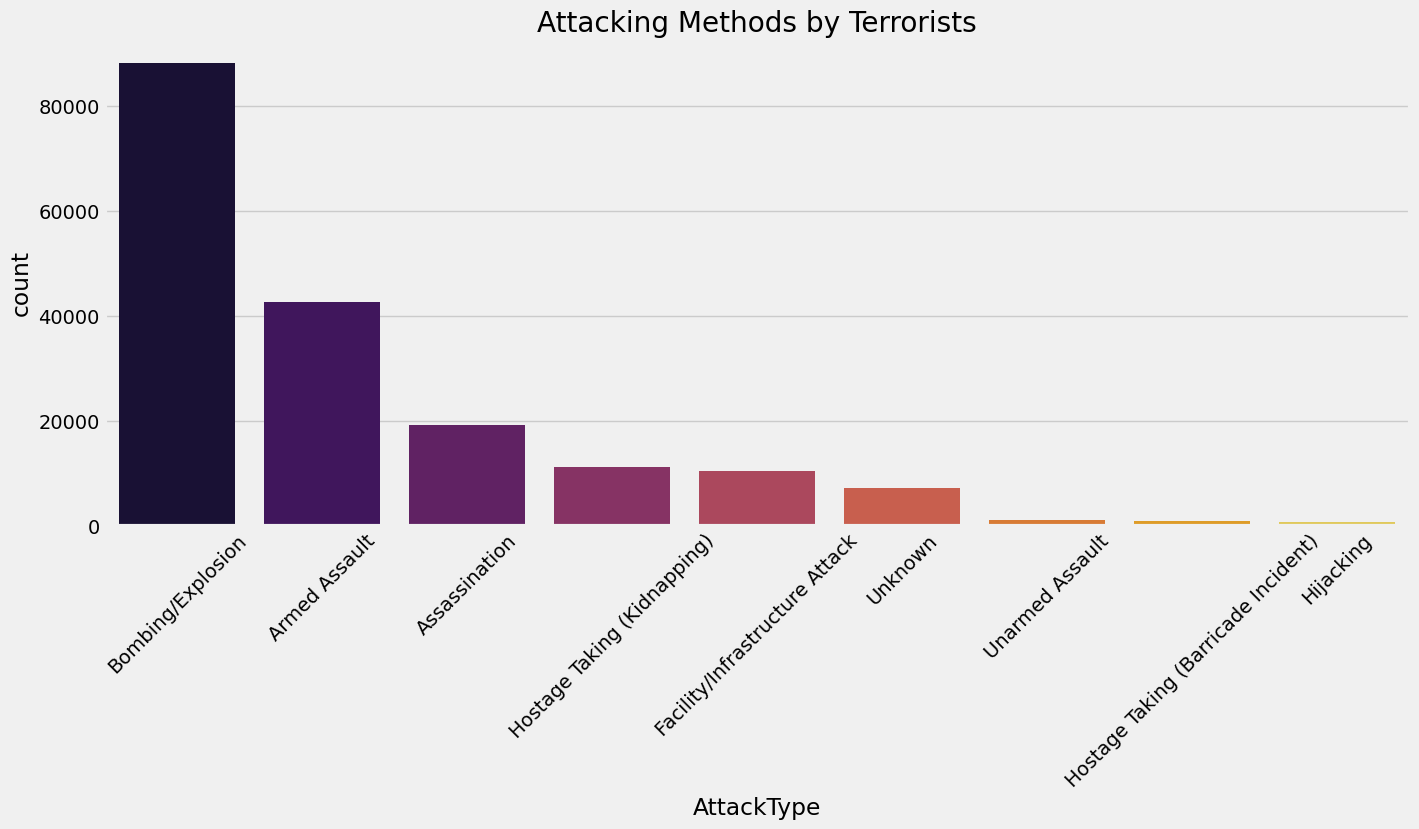

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot(x = 'AttackType',data=terror_df, palette = 'inferno',
              order = terror_df['AttackType'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Attacking Methods by Terrorists')
plt.show()

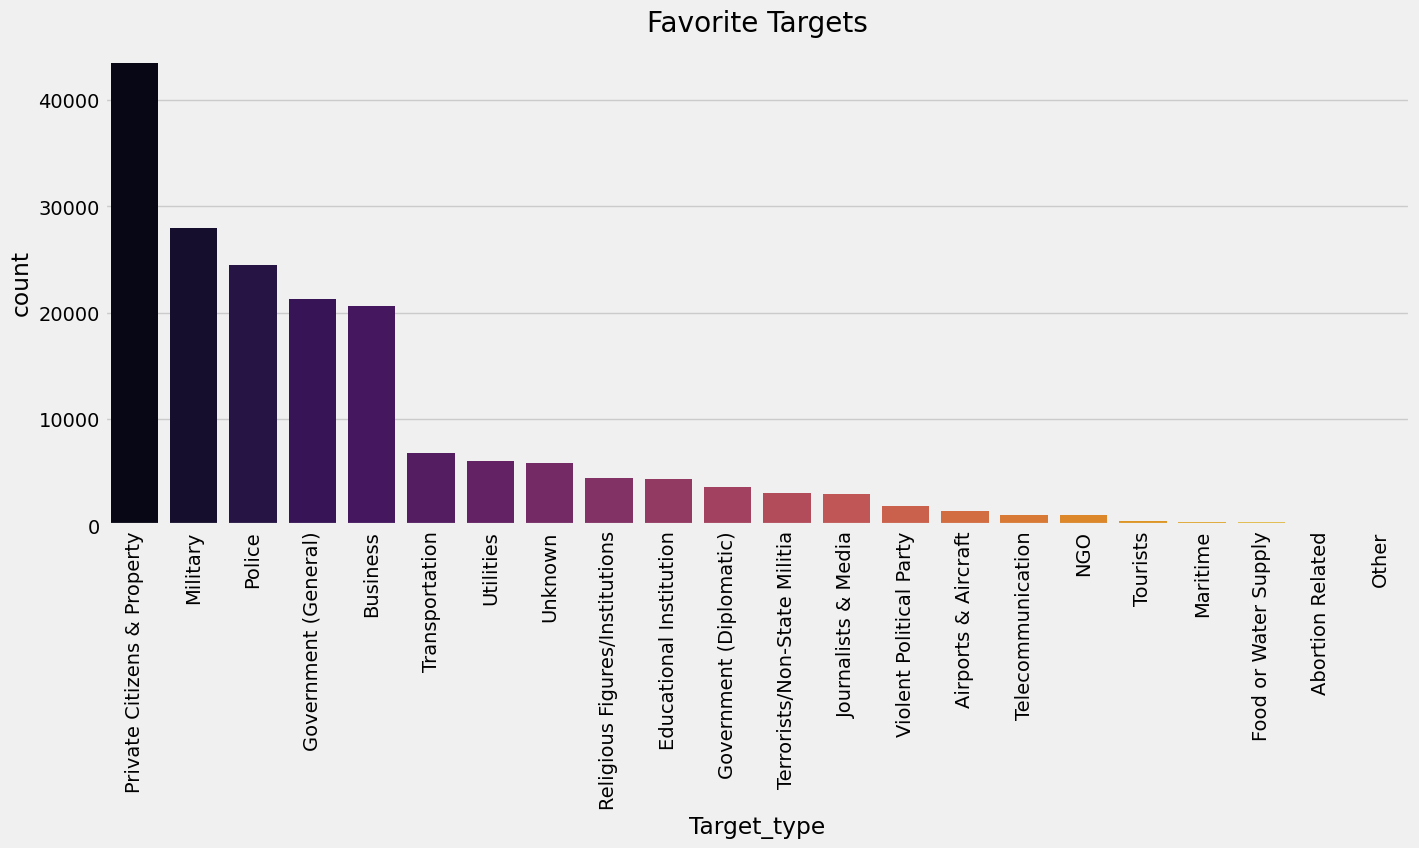

In [11]:
plt.subplots(figsize=(15,6))
sns.countplot(x = terror_df['Target_type'],palette='inferno',order=terror_df['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

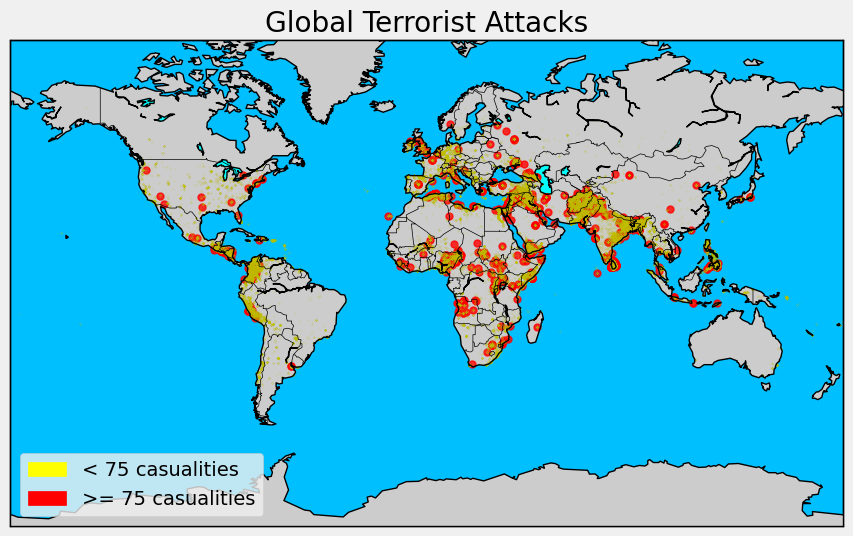

In [12]:
m = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180,
            urcrnrlon = 180, lat_ts =20, resolution = 'c')

lat_big = list(terror_df[terror_df['casualities'] >= 75].latitude)
long_big = list(terror_df[terror_df['casualities'] >= 75].longitude)

x_75, y_75 = m(long_big, lat_big)
m.plot(x_75, y_75, 'ro', markersize = 5, alpha = 0.8)


lat_small = list(terror_df[terror_df['casualities']<75].latitude)
long_small = list(terror_df[terror_df['casualities']<75].longitude)
x_small, y_small = m(long_small, lat_small)
m.plot(x_small, y_small, 'yo', markersize =0.2, alpha = 0.4)

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(lake_color = 'aqua')
m.drawmapboundary(fill_color = 'deepskyblue')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Global Terrorist Attacks')
plt.legend(loc = 'lower left', 
           handles = [mpatches.Patch(color = 'yellow', label = '< 75 casualities'),
                     mpatches.Patch(color = 'red', label = '>= 75 casualities')
                     ])

plt.show()

In [ ]:
terror_fol = terror_df.copy()
terror_fol.dropna(subset = ['latitude', 'longitude'], inplace = True)
location_fol = terror_fol[['latitude', 'longitude']][:5000]
country_fol = terror_fol['Country'][:5000]
city_fol=terror_fol['city'][:5000]
killed_fol=terror_fol['Killed'][:5000]
wound_fol=terror_fol['Wounded'][:5000]



def color_point(x):
    if x >= 30:
        color = 'red'
    elif ((x > 0 and x < 30)):
        color = 'blue'
    else:
        color = 'green'
    return color

def point_size(x):
    if (x > 30 and x < 100):
        size = 2
    elif (x >= 100 and x < 500):
        size = 8
    elif x >= 500:
        size = 16
    else:
        size = 0.5
    return size


folium_map = folium.Map(location = [30, 0],  tiles = 'CartoDB dark_matter', zoom_start = 2)



for point in location_fol.index:

    info = '<b>Country: </b>' + str(country_fol[point]) + '<br><b>City: </b>: '\
    +str(city_fol[point]) + '<br><b>Killed </b>: ' + str(killed_fol[point]) +\
    '<br><b>Wounded</b> : ' + str(wound_fol[point])

    iframe = folium.IFrame(html = info, width = 200, height =200)

    folium.CircleMarker(list(location_fol.loc[point].values),
                        popup = folium.Popup(iframe), radius = point_size(killed_fol[point]),
                        color = color_point(killed_fol[point])).add_to(folium_map)

folium_map

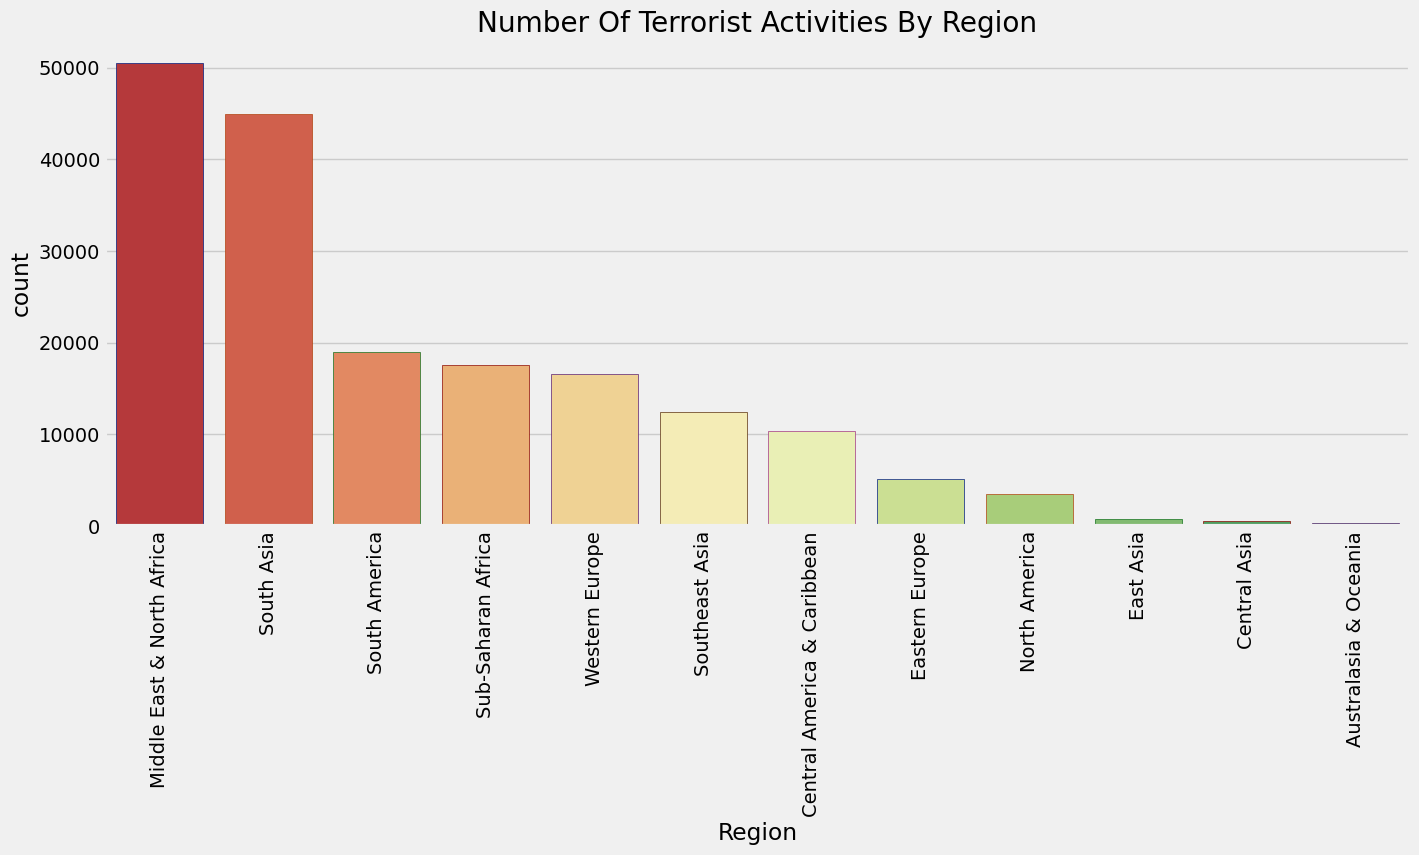

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(x = 'Region',data=terror_df ,palette='RdYlGn',
              edgecolor = sns.color_palette('dark', 7),
              order=terror_df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

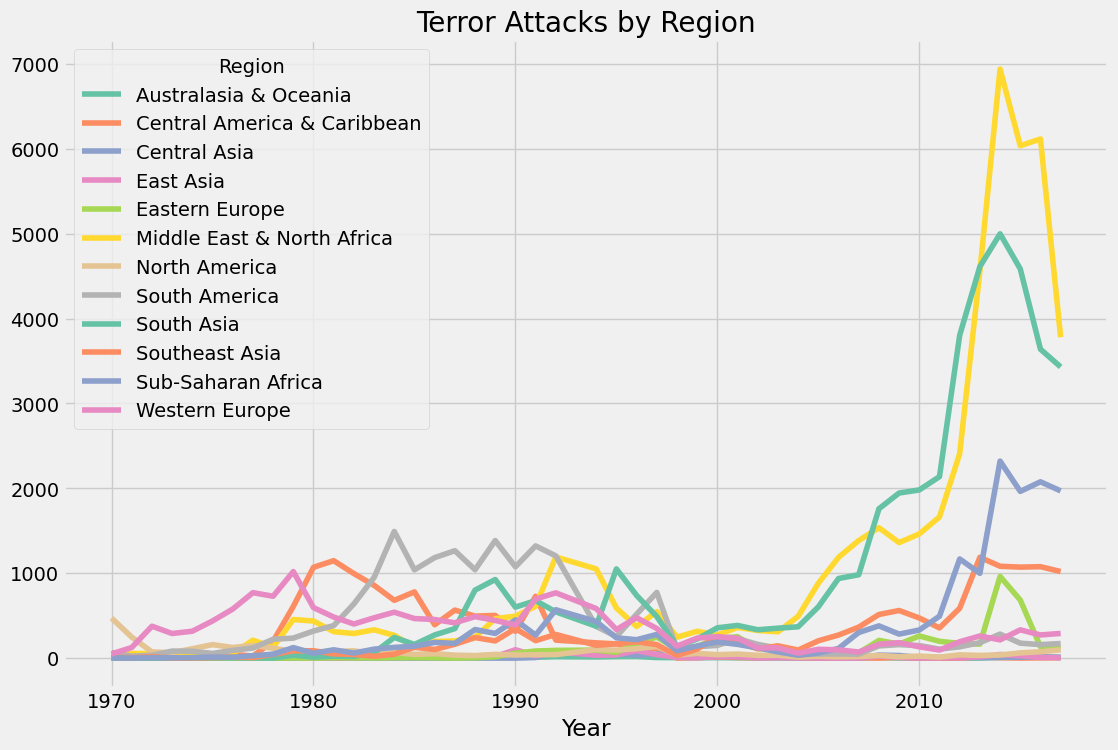

In [15]:
terror_region = pd.crosstab(terror_df.Year, terror_df.Region)
terror_region.plot(color = sns.color_palette('Set2', 12))
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.title("Terror Attacks by Region")
plt.show()

<font size = "3">
2010년대에 들어서며 중동과 남아시아 (파키스탄, 스리랑카 등), 북아프리카의 테러 증가횟수가 눈에 띈다. 반면 남미는 줄어든 편. 보통 이슬람관련 무장단체과 관련된 사건이 많은듯 하다. 

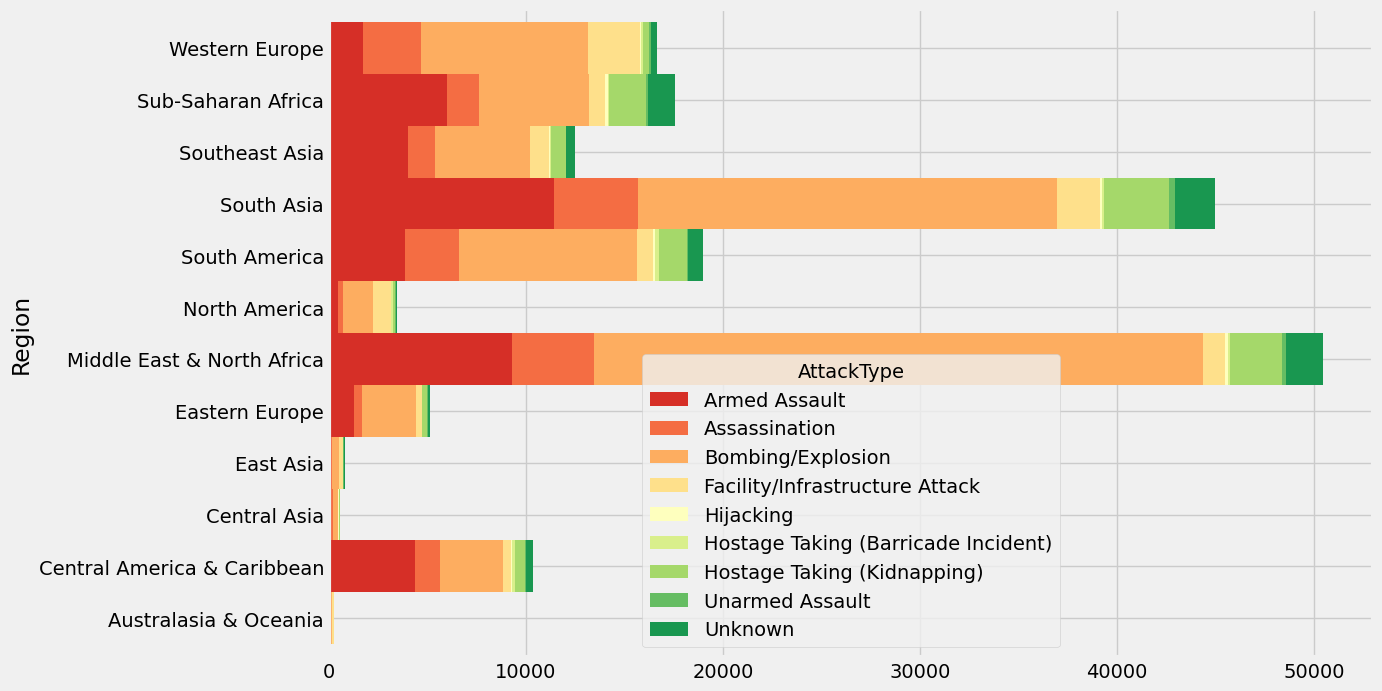

In [17]:
pd.crosstab(terror_df.Region, terror_df.AttackType ).plot.barh(
            stacked = True, width = 1, color = sns.color_palette('RdYlGn', 9) )
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

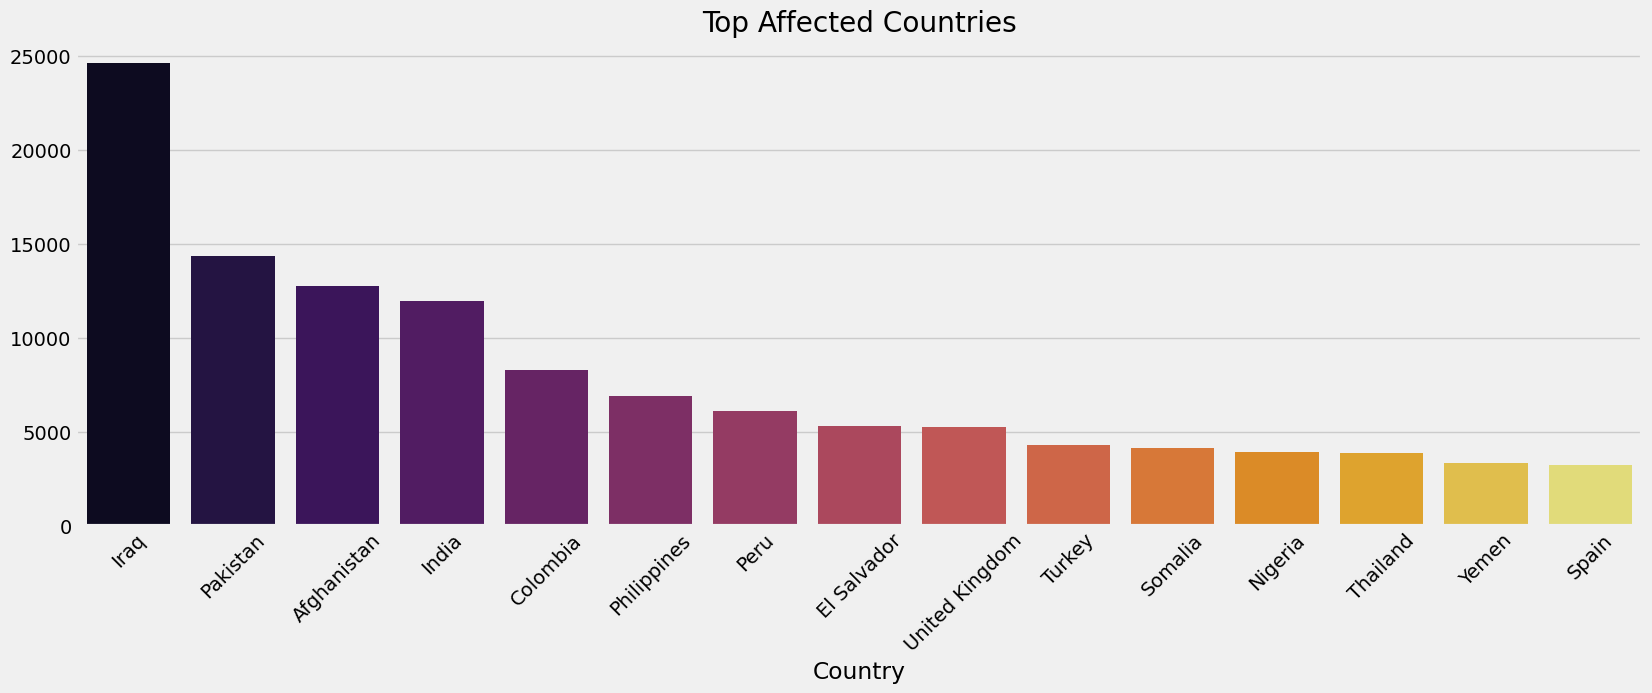

In [27]:
plt.subplots(figsize = (18, 6))
sns.barplot(x = terror_df['Country'].value_counts()[:15].index, 
            y = terror_df['Country'].value_counts().iloc[:15].values,
            palette = 'inferno')
plt.xticks(rotation =  45)
plt.title('Top Affected Countries')
plt.show()

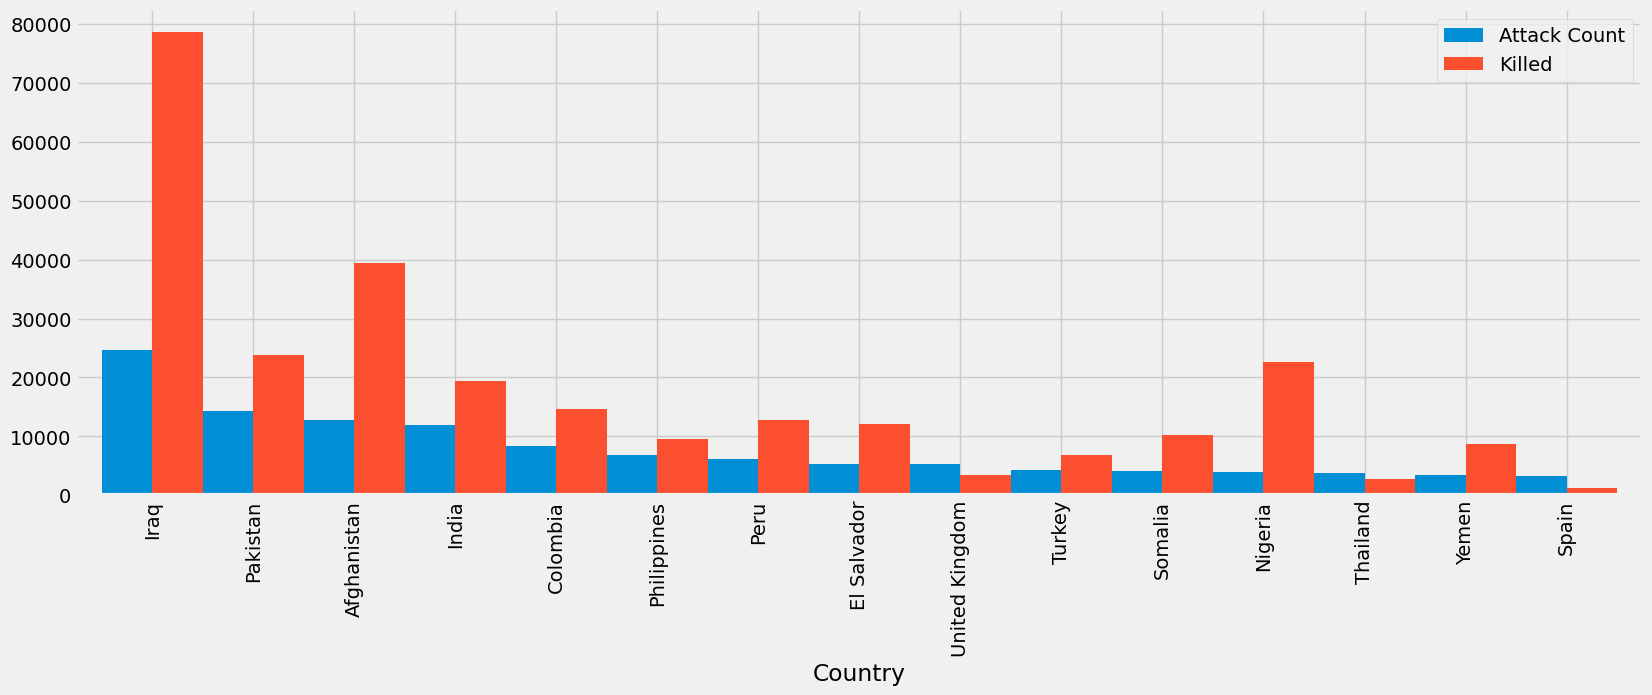

In [23]:
count_terror = terror_df['Country'].value_counts().iloc[:15].to_frame()
count_terror.columns = ['Attack Count']
count_killed = terror_df.groupby('Country')['Killed'].sum().to_frame()
count_terror.merge(count_killed, left_index = True, right_index = True, how ='left').plot.bar(
                    width = 1)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

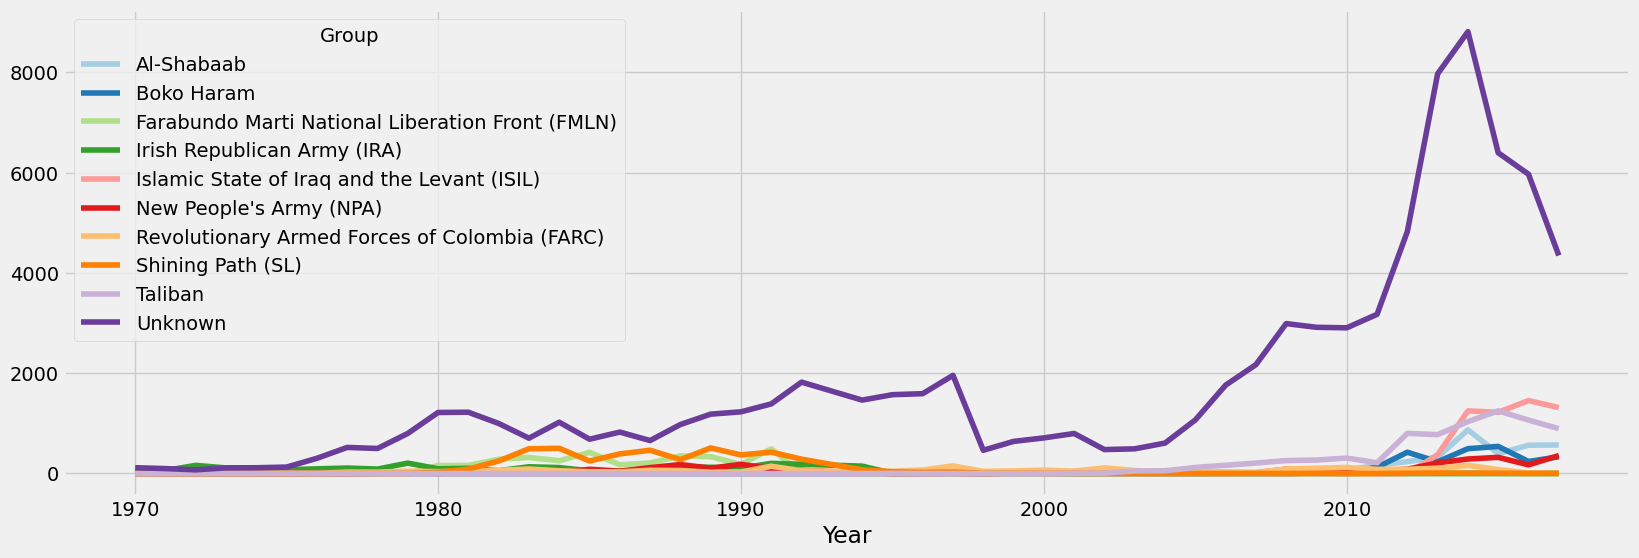

In [30]:
top_10_groups = terror_df[terror_df['Group'].isin(terror_df['Group'].value_counts()[:10].index )]
pd.crosstab(top_10_groups.Year, top_10_groups['Group'] ).plot(
            color = sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

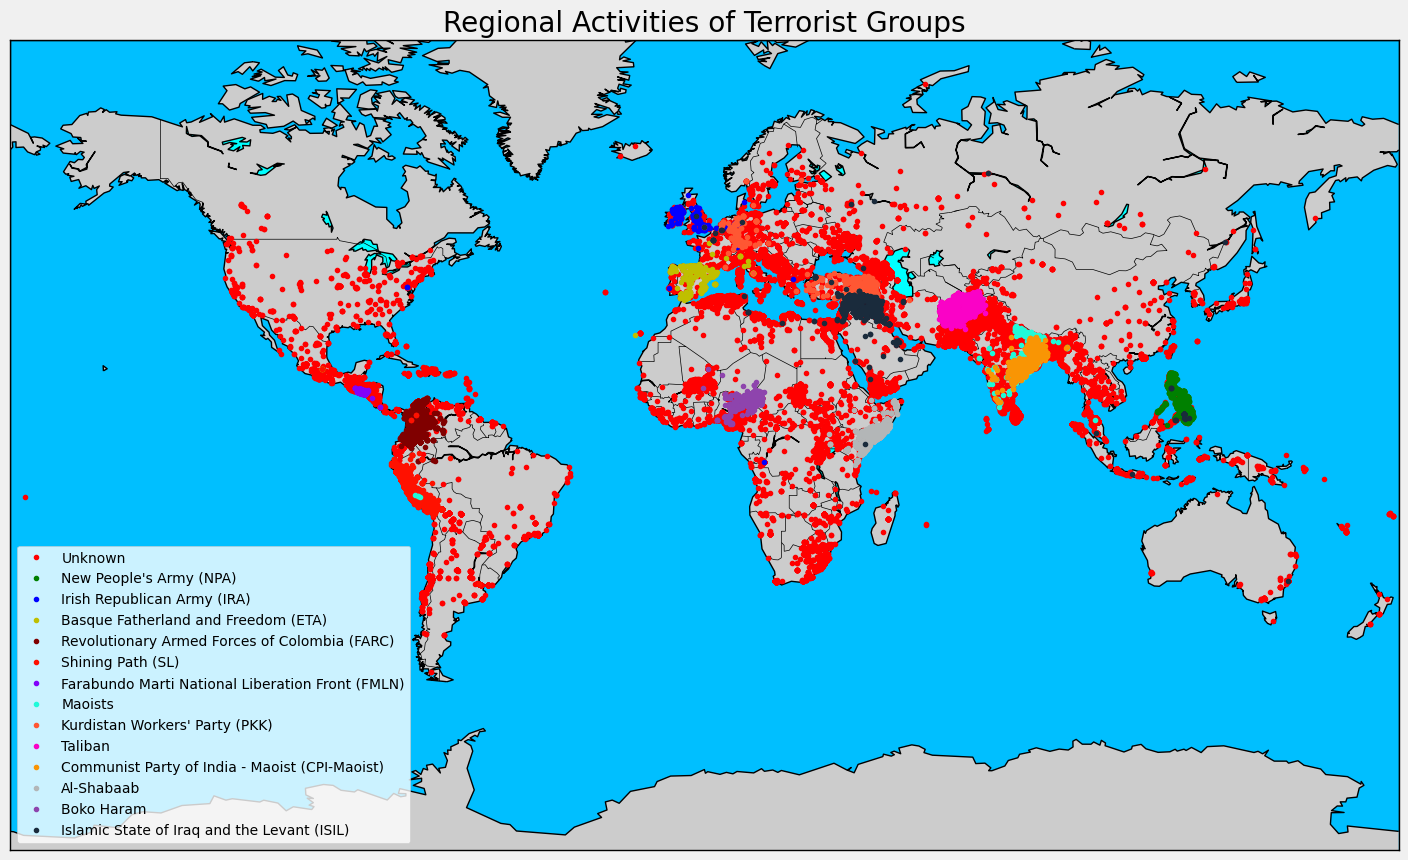

In [34]:
top_15_groups = terror_df[terror_df['Group'].isin(terror_df['Group'].value_counts().iloc[:14].index )]
bm = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, 
             urcrnrlon = 180, lat_ts = 20 , resolution = 'c'  )
bm.drawcoastlines()
bm.drawcountries()
bm.fillcontinents(lake_color ='aqua')
bm.drawmapboundary(fill_color = 'deepskyblue')
fig = plt.gcf()
fig.set_size_inches(22, 10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa',
        '#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
group_list  = list(top_15_groups['Group'].unique())

def group_points(group, color, label):
    lat_group = list(top_15_groups[top_15_groups['Group'] == group ].latitude )
    long_group = list(top_15_groups[top_15_groups['Group'] == group ].longitude )
    x_group, y_group = bm(long_group, lat_group)
    bm.plot(x_group, y_group, 'go', markersize = 3, color = color, label = label)

for i, j in zip(group_list, colors):
    group_points(i, j, i)

legend = plt.legend(loc = 'lower left', frameon = True, prop = {'size' : 10})
frame = legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups')
plt.show()